In [1]:
# Step 1: Load the dataset
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the dataset 
file_path = "F:\\AWFERA\\Machine learning\\AwferaMachineLearningProjects\\diabetes.csv"
df = pd.read_csv(file_path)


#Display basic information
print("Dataset Information")
print(df.info())


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [2]:
# Step 2: Handle Missing Values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Fill missing numerical values with the median

df.fillna(df.median(numeric_only = True), inplace = True)

#Fill missing categorical values with the mode (if any)

for col in df.select_dtypes(include = ['object']):
    df[col].fillna(df[col].mode()[0], inpplace = True)


Checking for missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [3]:
# Step 3: Prepare Data
# Separate features and Target variable

x = df.drop(columns = ['Outcome'])
y = df['Outcome']

# Step 4: Apply standard Scaling
scler = StandardScaler()
x_scaled = scler.fit_transform(x)

#Step 5: Split Data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state=42)
# Step 6: Train a Decision Tree Classifier

print("\nTraining Decision Traa Classifier........")
model = DecisionTreeClassifier(random_state = 42)
model.fit(x_train, y_train)

# Step 7: model Evaluation 
# predict on test data
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

#Classification report
print("\nClassification Report")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Training Decision Traa Classifier........

Model Accuracy: 0.70

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       151
           1       0.56      0.69      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.70      0.71       231


Confusion Matrix:
[[107  44]
 [ 25  55]]


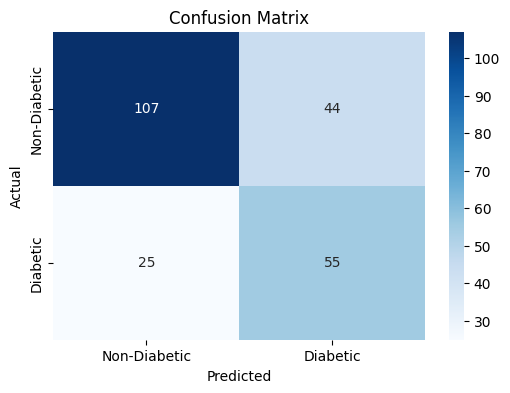

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [5]:
# Step 8: Test the model on new user input

# Example: new patient data (you can modify the values)
new_data = pd.DataFrame([{
    'Pregnancies': 2,
    'Glucose': 135,
    'BloodPressure': 72,
    'SkinThickness': 25,
    'Insulin': 100,
    'BMI': 28.5,
    'DiabetesPedigreeFunction': 0.42,
    'Age': 34
}])

# Scale the new input using the same scaler
new_data_scaled = scler.transform(new_data)

# Predict
new_prediction = model.predict(new_data_scaled)[0]
print("Prediction on new input:")
print("🔴 Diabetic" if new_prediction == 1 else "🟢 Not Diabetic")


Prediction on new input:
🔴 Diabetic


In [6]:
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
file_path = "F:\\AWFERA\\Machine learning\\AwferaMachineLearningProjects\\diabetes.csv"
df = pd.read_csv(file_path)

# Step 2: Handle Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 3: Prepare Data
x = df.drop(columns=['Outcome'])
y = df['Outcome']

# Step 4: Standard Scaling
scler = StandardScaler()
x_scaled = scler.fit_transform(x)

# Step 5: Split Data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Step 6: Train Model
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

# ---------------------- Streamlit Web App ----------------------
import streamlit as st

st.title("🧠 Diabetes Prediction App")
st.markdown("Enter patient data in the sidebar to check if they are diabetic.")

# Sidebar Input
st.sidebar.header("Enter Patient Information:")

pregnancies = st.sidebar.number_input("Pregnancies", min_value=0, max_value=20, value=1)
glucose = st.sidebar.number_input("Glucose", min_value=0, max_value=200, value=120)
blood_pressure = st.sidebar.number_input("Blood Pressure", min_value=0, max_value=150, value=70)
skin_thickness = st.sidebar.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
insulin = st.sidebar.number_input("Insulin", min_value=0, max_value=900, value=85)
bmi = st.sidebar.number_input("BMI", min_value=0.0, max_value=70.0, value=25.0)
dpf = st.sidebar.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=3.0, value=0.5)
age = st.sidebar.number_input("Age", min_value=10, max_value=100, value=30)

if st.sidebar.button("Predict"):
    # Step 7: Predict New Data
    user_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                           insulin, bmi, dpf, age]])
    user_data_scaled = scler.transform(user_data)
    prediction = model.predict(user_data_scaled)[0]

    # Display Result
    st.subheader("🔍 Prediction Result:")
    if prediction == 1:
        st.error("🔴 The person is **Diabetic**")
    else:
        st.success("🟢 The person is **Not Diabetic**")

    # Step 8: Model Accuracy
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    st.write(f"✅ Model Accuracy: **{acc:.2f}**")

    # Step 9: Confusion Matrix
    st.subheader("📊 Confusion Matrix")
    fig1, ax1 = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
                cmap='Blues', xticklabels=["Non-Diabetic", "Diabetic"],
                yticklabels=["Non-Diabetic", "Diabetic"], ax=ax1)
    st.pyplot(fig1)


2025-07-12 15:56:37.367 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 15:56:39.132 
  command:

    streamlit run c:\Users\Mani\.conda\envs\tfod310\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-07-12 15:56:39.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 15:56:39.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 15:56:39.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 15:56:39.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 15:56:39.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-12 15:56:39.147 Thread 'MainTh